<a href="https://colab.research.google.com/github/damilolas/Welcome-to-My-Github-Depository-/blob/main/Multi_Label_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install spacy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

dataset gotten from [here](https://www.kaggle.com/datasets/hsrobo/titlebased-semantic-subject-indexing?resource=download)

In [ ]:
df = pd.read_csv('econbiz.csv')

In [ ]:
df

,id,title,labels,fold
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3,6
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3,8
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1,8
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...,2
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1,8
...,...,...,...,...
1064629,10011648325,Keadaan angkatan kerja di Indonesia : angka se...,11271-0\t11272-5\t17578-0,10
1064630,10011648452,Statistical abstract,17678-3\t19072-1,10
1064631,10011649317,Review of economic studies and research Virgil...,10032-2\t12041-5\t17177-4\t16809-5,10
1064632,10011650217,Review of capital as power,11046-0\t10032-2\t10037-6,10


In [ ]:
df.head()

,id,title,labels,fold
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3,6
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3,8
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1,8
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...,2
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1,8


In [ ]:
df.isnull().sum()

id        0
title     0
labels    0
fold      0
dtype: int64

In [ ]:
df.shape

(1064634, 4)

In [ ]:
df.info

<bound method DataFrame.info of                   id                                              title  \
0        10000168395  Water insecurity and the poor : issues and res...   
1        10000168396  Crop biotechnology in developing countries : a...   
2        10000338739     Medicaid, intergovernmental trends and options   
3        10000413084  State solvency regulation of property-casualty...   
4        10000549504    Tax and expenditure limits on local governments   
...              ...                                                ...   
1064629  10011648325  Keadaan angkatan kerja di Indonesia : angka se...   
1064630  10011648452                               Statistical abstract   
1064631  10011649317  Review of economic studies and research Virgil...   
1064632  10011650217                         Review of capital as power   
1064633  10011654285                                             Report   

                                                    labels  fold  


In [ ]:
df.title.value_counts().sort_values(ascending =False)

Country report                                                                                                            232
Country profile                                                                                                           222
Annual report                                                                                                             189
Trade policy review                                                                                                       129
Economic census                                                                                                            92
                                                                                                                         ... 
Political corporate social responsibility : reviewing theories and setting new agendas                                      1
Effectiveness of performance appraisal : an integrated framework                                                      

In [ ]:
df.title.value_counts().sort_values(ascending =True)

Staying competitive in the political unrest and global financial crisis : perspective of a Thai healthcare organization      1
The yen, the US dollar and the speculative attacks against the Thailand baht                                                 1
Comparative causation : a re-examination                                                                                     1
Inference with weak intruments                                                                                               1
The economics of fraudulent accounting                                                                                       1
                                                                                                                          ... 
Economic census                                                                                                             92
Trade policy review                                                                                            

<AxesSubplot:>

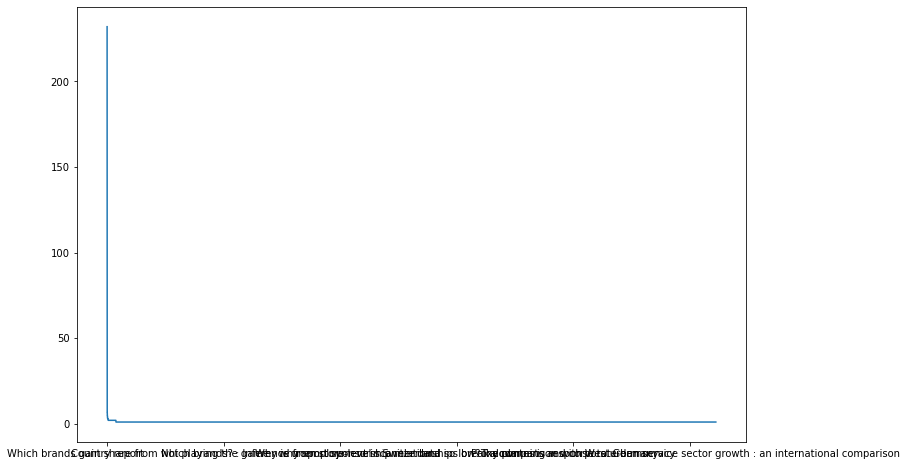

In [ ]:
plt.figure(figsize=(12,8))
df['title'].value_counts().plot(kind='line')

In [ ]:
df.fold.value_counts()

10    994015
5       7089
1       7088
3       7083
7       7079
4       7074
6       7061
2       7057
8       7036
9       7028
0       7024
Name: fold, dtype: int64

<AxesSubplot:>

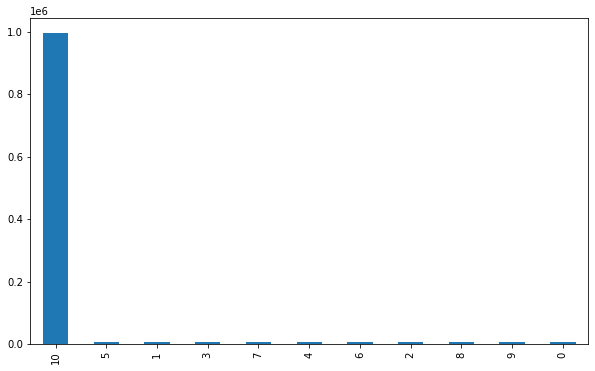

In [ ]:
plt.figure(figsize=(10,6))
df['fold'].value_counts().plot(kind='bar')

In [ ]:
df.head()

,id,title,labels,fold
0,10000168395,Water insecurity and the poor : issues and res...,18377-5\t18378-3\t18232-3\t10488-1\t10492-3,6
1,10000168396,Crop biotechnology in developing countries : a...,18317-2\t16696-6\t11529-1\t10492-3,8
2,10000338739,"Medicaid, intergovernmental trends and options",13415-6\t19507-6\t19517-3\t11600-0\t17829-1,8
3,10000413084,State solvency regulation of property-casualty...,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...,2
4,10000549504,Tax and expenditure limits on local governments,11553-4\t11653-0\t11539-5\t11731-6\t17829-1,8


In [ ]:
df['title'].nunique()

1044132

In [ ]:
labels=df['labels'].value_counts()

In [ ]:
labels[:-2]

15272-6\t19073-6                                                 1602
15458-6\t19073-6                                                  779
15055-0\t19073-6                                                  449
10771-6\t17983-5                                                  377
15272-6                                                           375
                                                                 ... 
19210-1\t10052-3\t10199-1\t15773-5\t15767-0\t12040-0\t19073-6       1
11192-3\t11772-6\t11769-2\t17255-3                                  1
13776-2\t11153-6\t12253-4\t11223-4\t19073-6                         1
19154-6\t12304-6\t11302-1\t11341-5\t12920-5\t19037-3\t17829-1       1
12903-5\t18067-6\t10057-0\t10222-4\t13810-0\t19073-6                1
Name: labels, Length: 892440, dtype: int64

In [ ]:
y = pd.get_dummies(df['fold'], prefix='label')
y

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1064629,0,0,0,0,0,0,0,0,0,0,1
1064630,0,0,0,0,0,0,0,0,0,0,1
1064631,0,0,0,0,0,0,0,0,0,0,1
1064632,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
label = list(y.columns)
label

['label_0',
 'label_1',
 'label_2',
 'label_3',
 'label_4',
 'label_5',
 'label_6',
 'label_7',
 'label_8',
 'label_9',
 'label_10']

In [ ]:
y = y.to_dict('index')
y

{0: {'label_0': 0,
  'label_1': 0,
  'label_2': 0,
  'label_3': 0,
  'label_4': 0,
  'label_5': 0,
  'label_6': 1,
  'label_7': 0,
  'label_8': 0,
  'label_9': 0,
  'label_10': 0},
 1: {'label_0': 0,
  'label_1': 0,
  'label_2': 0,
  'label_3': 0,
  'label_4': 0,
  'label_5': 0,
  'label_6': 0,
  'label_7': 0,
  'label_8': 1,
  'label_9': 0,
  'label_10': 0},
 2: {'label_0': 0,
  'label_1': 0,
  'label_2': 0,
  'label_3': 0,
  'label_4': 0,
  'label_5': 0,
  'label_6': 0,
  'label_7': 0,
  'label_8': 1,
  'label_9': 0,
  'label_10': 0},
 3: {'label_0': 0,
  'label_1': 0,
  'label_2': 1,
  'label_3': 0,
  'label_4': 0,
  'label_5': 0,
  'label_6': 0,
  'label_7': 0,
  'label_8': 0,
  'label_9': 0,
  'label_10': 0},
 4: {'label_0': 0,
  'label_1': 0,
  'label_2': 0,
  'label_3': 0,
  'label_4': 0,
  'label_5': 0,
  'label_6': 0,
  'label_7': 0,
  'label_8': 1,
  'label_9': 0,
  'label_10': 0},
 5: {'label_0': 0,
  'label_1': 0,
  'label_2': 0,
  'label_3': 0,
  'label_4': 0,
  'label_5':

In [ ]:
data = list(zip(df['title'],[{'cats': cats} for cats in y.values()]))
print(data[1])

('Crop biotechnology in developing countries : a conceptual framework for ex ante economic analyses', {'cats': {'label_0': 0, 'label_1': 0, 'label_2': 0, 'label_3': 0, 'label_4': 0, 'label_5': 0, 'label_6': 0, 'label_7': 0, 'label_8': 1, 'label_9': 0, 'label_10': 0}})


In [ ]:
train_data, test_data = train_test_split(data, train_size=1, random_state=7)

In [ ]:
len(train_data)

1

In [ ]:
len(test_data)

1064633

In [ ]:
nlp = spacy.blank("en")

In [ ]:
textcat = nlp.add_pipe("textcat_multilabel")
for i in label:
    textcat.add_label(i)

In [ ]:
textcat.labels

('label_0',
 'label_1',
 'label_2',
 'label_3',
 'label_4',
 'label_5',
 'label_6',
 'label_7',
 'label_8',
 'label_9',
 'label_10')

In [ ]:
optimizer = nlp.begin_training()
iterations = 3

In [ ]:
with nlp.select_pipes(enable="textcat_multilabel"):
    for j in range(iterations):
        losses = {}
        k = 0
        batches = minibatch(train_data, size = compounding(4.,32.,1.001))
        for batch in batches:
            text, annotations = zip(*batch)
            example = []
            for i in range(len(text)):
                doc = nlp.make_doc(text[i])
                example.append(Example.from_dict(doc, annotations[i]))
            nlp.update(example, sgd=optimizer, drop=0.2, losses = losses)
            print('Batch No: {} Loss = {}'.format(k, round(losses['textcat_multilabel'])))
            k += 1
        print("\n\n Completed Iterations : {} ".format(j))

Batch No: 0 Loss = 0


 Completed Iterations : 0 
Batch No: 0 Loss = 0


 Completed Iterations : 1 
Batch No: 0 Loss = 0


 Completed Iterations : 2 


In [ ]:
filter = df["title"] != ""
df= df[filter]
df= df.dropna()

In [ ]:
print(df["title"][160])

Factor mobility and fiscal policy in the EU : policy issues and analytical approaches


In [ ]:
print("Fold:" + str(df["fold"][160]))
print("Title:" + str(df["title"][160]))
print("Labels:" + str(df["labels"][160]))
print("ID:" + str(df["id"][160]))

Fold:5
Title:Factor mobility and fiscal policy in the EU : policy issues and analytical approaches
Labels:10314-6	11728-2	16318-3	19404-2	10811-6	11268-3	17983-5
ID:10001390887


In [ ]:
df_labels = df[["id", "title", "fold", "labels"]]
df_labels.head()

,id,title,fold,labels
0,10000168395,Water insecurity and the poor : issues and res...,6,18377-5\t18378-3\t18232-3\t10488-1\t10492-3
1,10000168396,Crop biotechnology in developing countries : a...,8,18317-2\t16696-6\t11529-1\t10492-3
2,10000338739,"Medicaid, intergovernmental trends and options",8,13415-6\t19507-6\t19517-3\t11600-0\t17829-1
3,10000413084,State solvency regulation of property-casualty...,2,13297-0\t13294-6\t13818-5\t12228-3\t10894-4\t1...
4,10000549504,Tax and expenditure limits on local governments,8,11553-4\t11653-0\t11539-5\t11731-6\t17829-1


In [ ]:
X = df.title
Y = df.fold
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 851707
Test Data size 212927


In [ ]:
train_data.head(10)

,id,title,labels,fold
165733,10000889069,HR 2666: the Community Development Banking and...,19467-6\t10552-4\t17829-1,10
641268,10003336615,Are traditional retirements a thing of the pas...,16526-3\t11253-2\t17829-1,10
632345,10003291906,Diffusion models in marketing : how to incorpo...,18082-3\t12766-3\t19073-6,10
103300,10000722772,International countertrade,10877-4,10
379339,10001286151,"Policy options relating to infrastructure, tra...",12004-4\t11833-5\t11810-3\t17586-1,10
140339,10000823051,Industrialization and industrialism in a devel...,10500-2\t16692-0\t11061-4\t17569-1,10
489694,10001599540,Latin America : its future in the global economy,10617-2\t19326-3\t18181-1\t19317-4\t17990-1,10
784037,10003855981,Entrepreneurship education in the UK : a criti...,12041-5\t27358-1\t20261-2\t17374-2,10
20472,10003425648,Gasoline and diesel demand in Europe : new ins...,14212-1\t14214-4\t18989-2\t10237-5\t19037-3\t1...,8
304946,10001159656,Climate change and world food security : speci...,18069-2\t16809-5\t13160-6,10


In [ ]:
test_data.head(10)

,id,title,labels,fold
344447,10001222570,A variation on general equilibrium analysis of...,11659-2\t11696-3\t10070-1\t19073-6,10
329758,10001199164,Business law in China : evolutionary revolution,10438-2\t10823-6\t17565-2,10
758501,10003796952,"China, India lead growth in Asian refining cap...",13001-5\t19427-4\t17553-2,10
851887,10008695345,Incentive compatibility for the stable matchin...,28089-4\t15458-6,10
259144,10001087908,"Chinese reforms, inflation and the allocation ...",10994-0\t11506-6\t10008-6\t11033-2\t17565-2,10
807325,10003909640,The evolution of closed-loop supply chain rese...,21020-5\t12807-1\t12294-4\t24704-2\t12320-1,10
29967,10003751871,What goes up must come down? : house price dyn...,18745-2\t17829-1,5
277500,10001116138,Homework in macroeconomics : household product...,10177-4\t10176-6\t10347-5\t19073-6,10
304769,10001159341,"Money, inflation, and output growth : does the...",10382-3\t16809-5\t11506-6,10
966309,10009711867,Chiefs : elite control of civil society and ec...,11302-1\t16658-0\t10575-6\t17722-5,10


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 5


In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (4, 30)
Testing X Shape: (4, 30)


In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
history = model.fit(Y_test,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
1065/1065 [==============================] - 9s 8ms/step - loss: -1380087.6250 - accuracy: 0.0067 - val_loss: -1692529.1250 - val_accuracy: 0.0063
Epoch 2/10
1065/1065 [==============================] - 9s 9ms/step - loss: -2043405.5000 - accuracy: 0.0067 - val_loss: -2420897.2500 - val_accuracy: 0.0063


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.fold.to_list())

y_train = encoder.transform(train_data.fold.to_list())
y_test = encoder.transform(test_data.fold.to_list())

y_train = y_train.reshape(-2,1)
y_test = y_test.reshape(-2,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (851707, 1)
y_test shape: (212927, 1)


In [ ]:
score = model.evaluate(y_train)

26616/26616 [==============================] - 28s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
score = model.evaluate(y_test)

6654/6654 [==============================] - 7s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
print("Test Score:", score[1])
print("Test Accuracy:", score[0])

Test Score: 0.0
Test Accuracy: 0.0


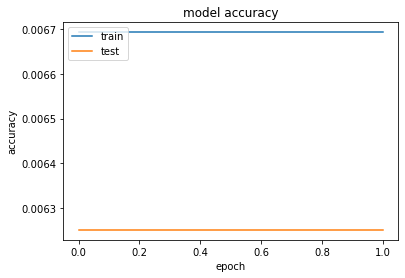

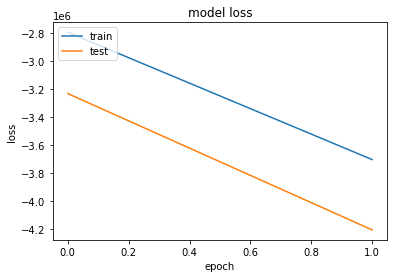

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left' )
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()